In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('big_data.csv',engine='python')
data

comments                                        description  duration  \
0         4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1          265  With the same humor and humanity he exuded in ...       977   
2          124  New York Times columnist David Pogue takes aim...      1286   
3          200  In an emotionally charged talk, MacArthur-winn...      1116   
4          593  You've never seen data presented like this. Wi...      1190   
...        ...                                                ...       ...   
2457        17  Between 2008 and 2016, the United States depor...       476   
2458         6  How can you study Mars without a spaceship? He...       290   
2459        10  Science fiction visions of the future show us ...       651   
2460        32  In an unmissable talk about race and politics ...      1100   
2461         8  With more than half of the world population li...       519   

             event   film_date  languages         main_speaker  \
0          TED2006  1140825600         60         Ken Robinson   
1          TED2006  1140825600         43              Al Gore   
2          TED2006  1140739200         26          David Pogue   
3          TED2006  1140912000         35        Majora Carter   
4          TED2006  1140566400         48         Hans Rosling   
...            ...         ...        ...                  ...   
2457       TED2017  1496707200          4     Duarte Geraldino   
2458       TED2017  1492992000          3  Armando Azua-Bustos   
2459       TED2017  1492992000          1       Radhika Nagpal   
2460  TEDxMileHigh  1499472000          1     Theo E.J. Wilson   
2461       TED2017  1492992000          1    Karoliina Korppoo   

                                                   name  num_speaker  \
0             Ken Robinson: Do schools kill creativity?            1   
1                  Al Gore: Averting the climate crisis            1   
2                         David Pogue: Simplicity sells            1   
3                    Majora Carter: Greening the ghetto            1   
4         Hans Rosling: The best stats you've ever seen            1   
...                                                 ...          ...   
2457  Duarte Geraldino: What we're missing in the de...            1   
2458  Armando Azua-Bustos: The most Martian place on...            1   
2459  Radhika Nagpal: What intelligent machines can ...            1   
2460  Theo E.J. Wilson: A black man goes undercover ...            1   
2461  Karoliina Korppoo: How a video game might help...            1   

      published_date  ...     views  \
0         1151367060  ...  47227110   
1         1151367060  ...   3200520   
2         1151367060  ...   1636292   
3         1151367060  ...   1697550   
4         1151440680  ...  12005869   
...              ...  ...       ...   
2457      1505851216  ...    450430   
2458      1505919737  ...    417470   
2459      1506006095  ...    375647   
2460      1506024042  ...    419309   
2461      1506092422  ...    391721   

                                             transcript    AFRAID    AMUSED  \
0     Good morning. How are you?(Laughter)It's been ...  0.092794  0.114177   
1     Thank you so much, Chris. And it's truly a gre...  0.108238  0.111975   
2     (Music: "The Sound of Silence," Simon & Garfun...  0.093672  0.123894   
3     If you're here today ?�? and I'm very happy th...  0.105926  0.106197   
4     About 10 years ago, I took on the task to teac...  0.108617  0.112215   
...                                                 ...       ...       ...   
2457  So, Ma was trying to explain something to me a...  0.102343  0.108939   
2458  This is a picture of a sunset on Mars taken by...  0.120188  0.119194   
2459  In my early days as a graduate student, I went...  0.097120  0.131195   
2460  I took a cell phone and accidentally made myse...  0.094750  0.117907   
2461  We humans are becoming an urban species, so ci...  0.09

In [28]:
train, test = train_test_split(data, test_size=0.2, random_state=0)
print(data["transcript"][0])

Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whole thing. In fact, I'm leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we've had and in all of the people here. Just the variety of it and the range of it. The second is that it's put us in a place where we have no idea what's going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don't you? I find this very interesting. If you're at a dinner party, and you say you work in education ?�? Actually, you're not often at dinner parties, frankly.(Laughter)If you work in education, you're not asked.(Laughter)And you're never asked back, curiously. That's strange to me. But if you are, and you say to somebody, you know, they 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
# initialize the TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words="english",\
 min_df=5) 
dtm= tfidf_vect.fit_transform(train["transcript"])
print (dtm.shape)

(1969, 17546)


In [31]:
from nltk.cluster import KMeansClusterer, \
cosine_distance

# initialize clustering model using cosine distance
num_clusters=10

clusterer = KMeansClusterer(num_clusters, \
 cosine_distance, \
 repeats=20)

clusters = clusterer.cluster(dtm.toarray(), \
 assign_clusters=True)

print(clusters[0:5])

[8, 7, 8, 4, 8]


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

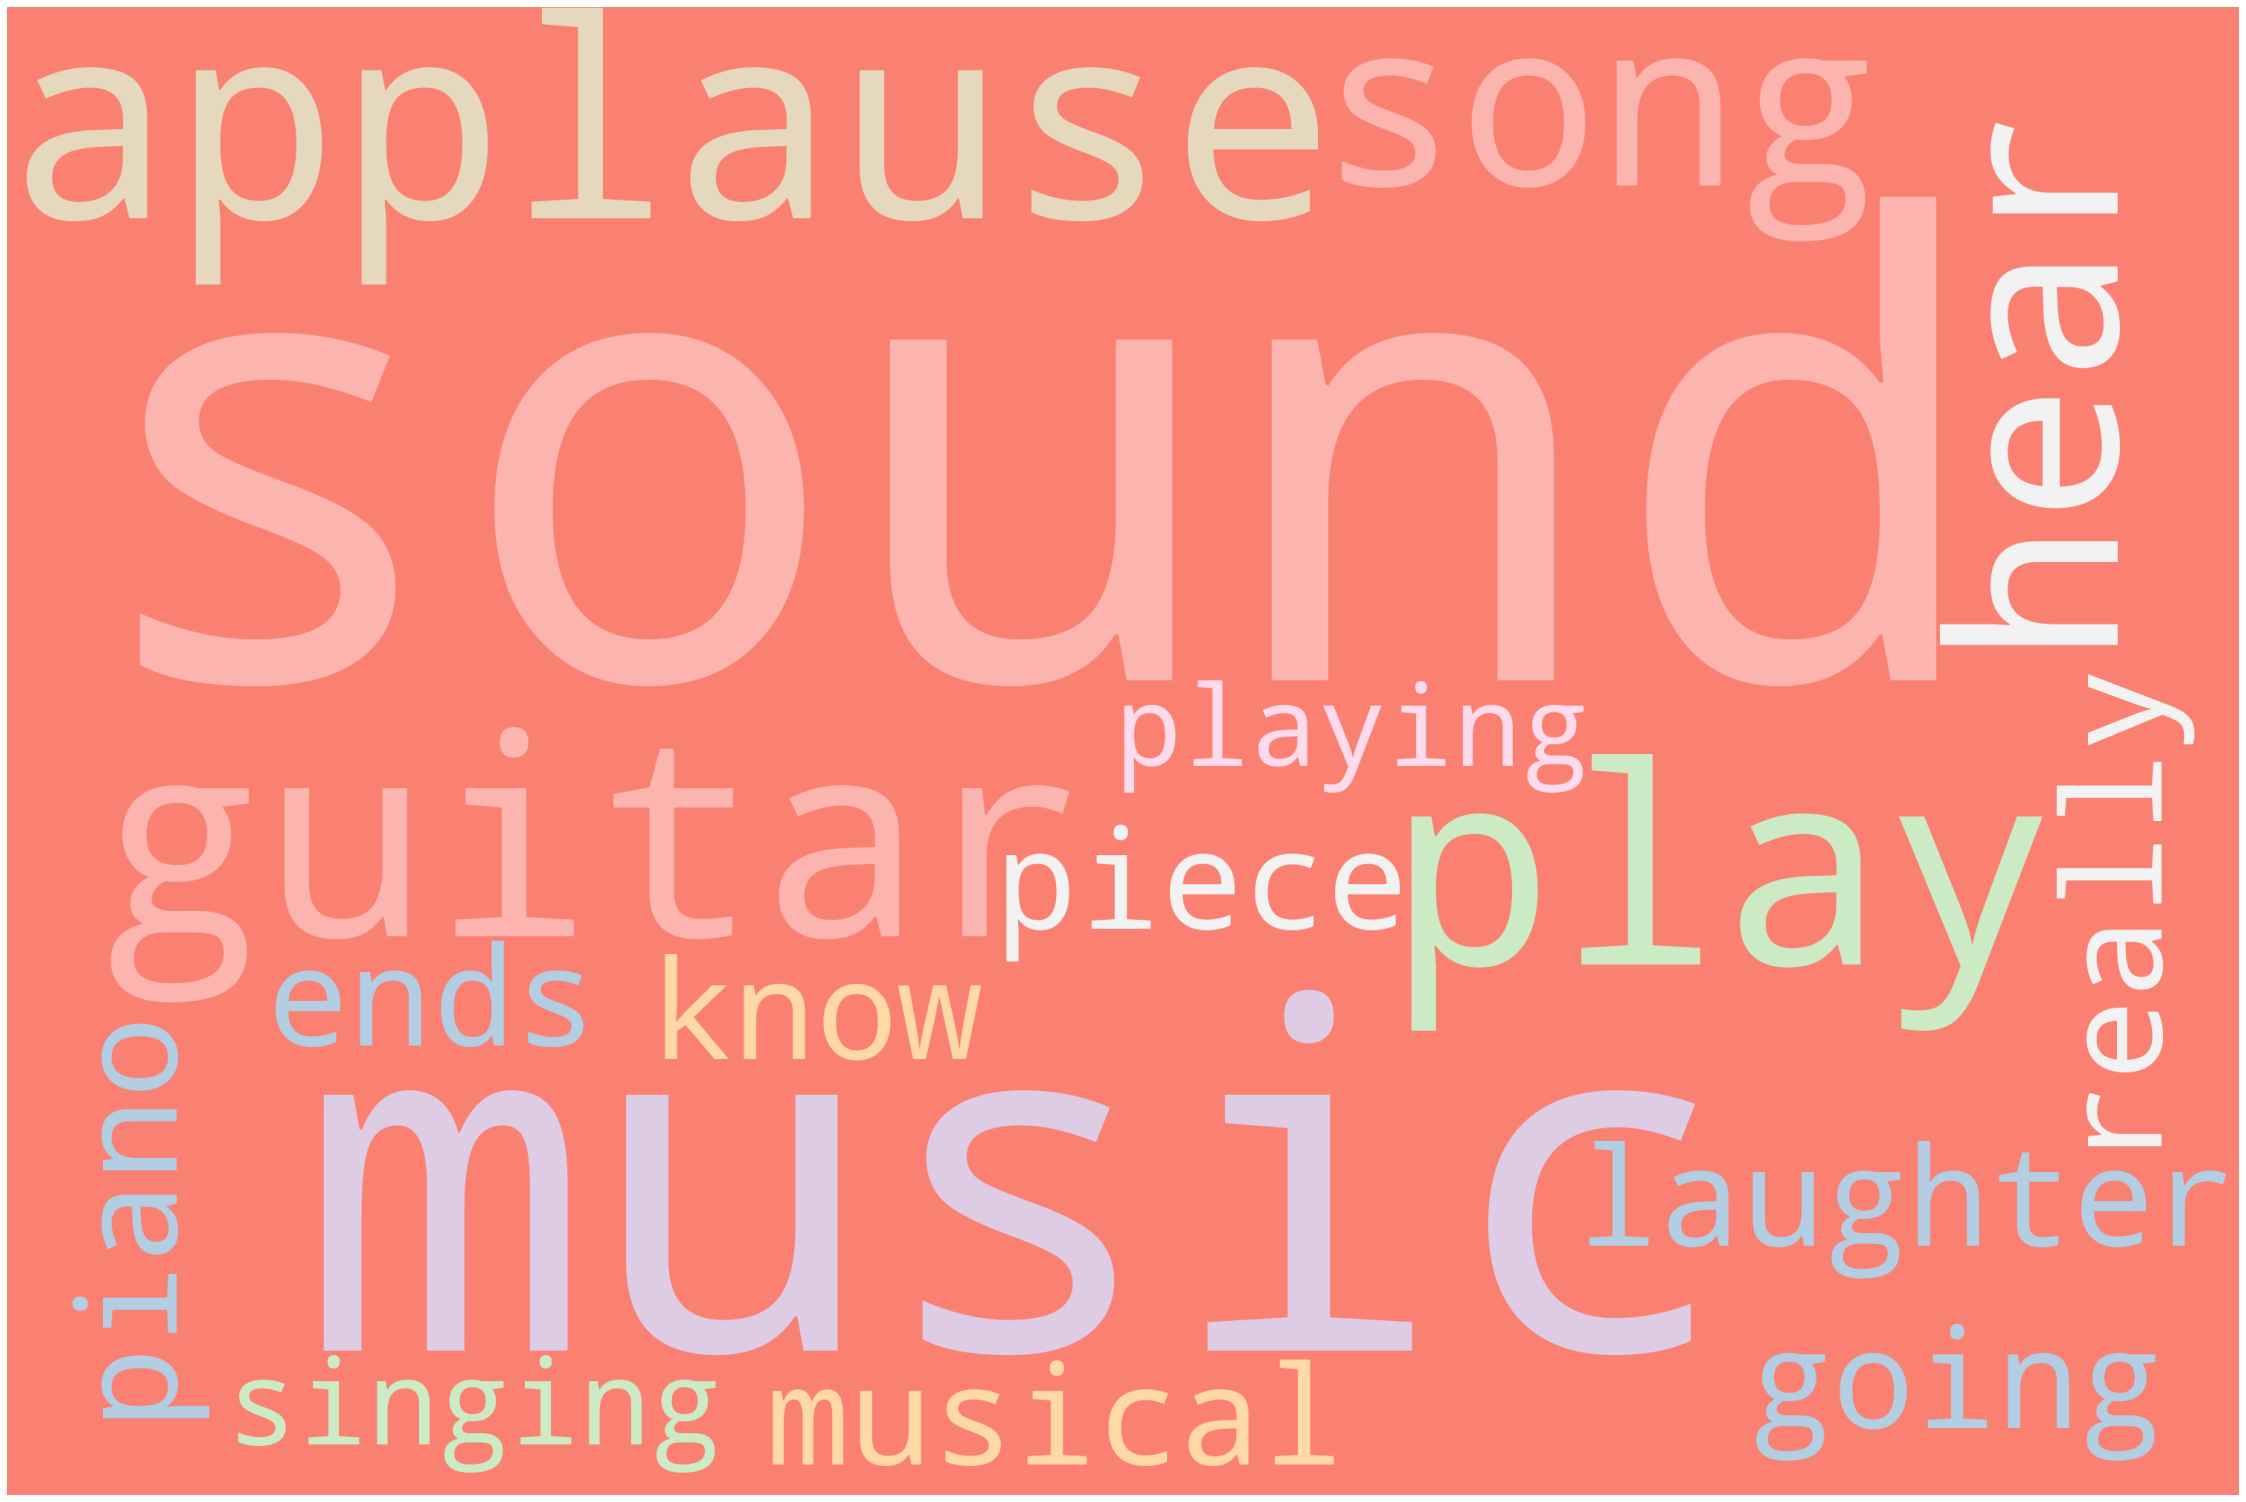

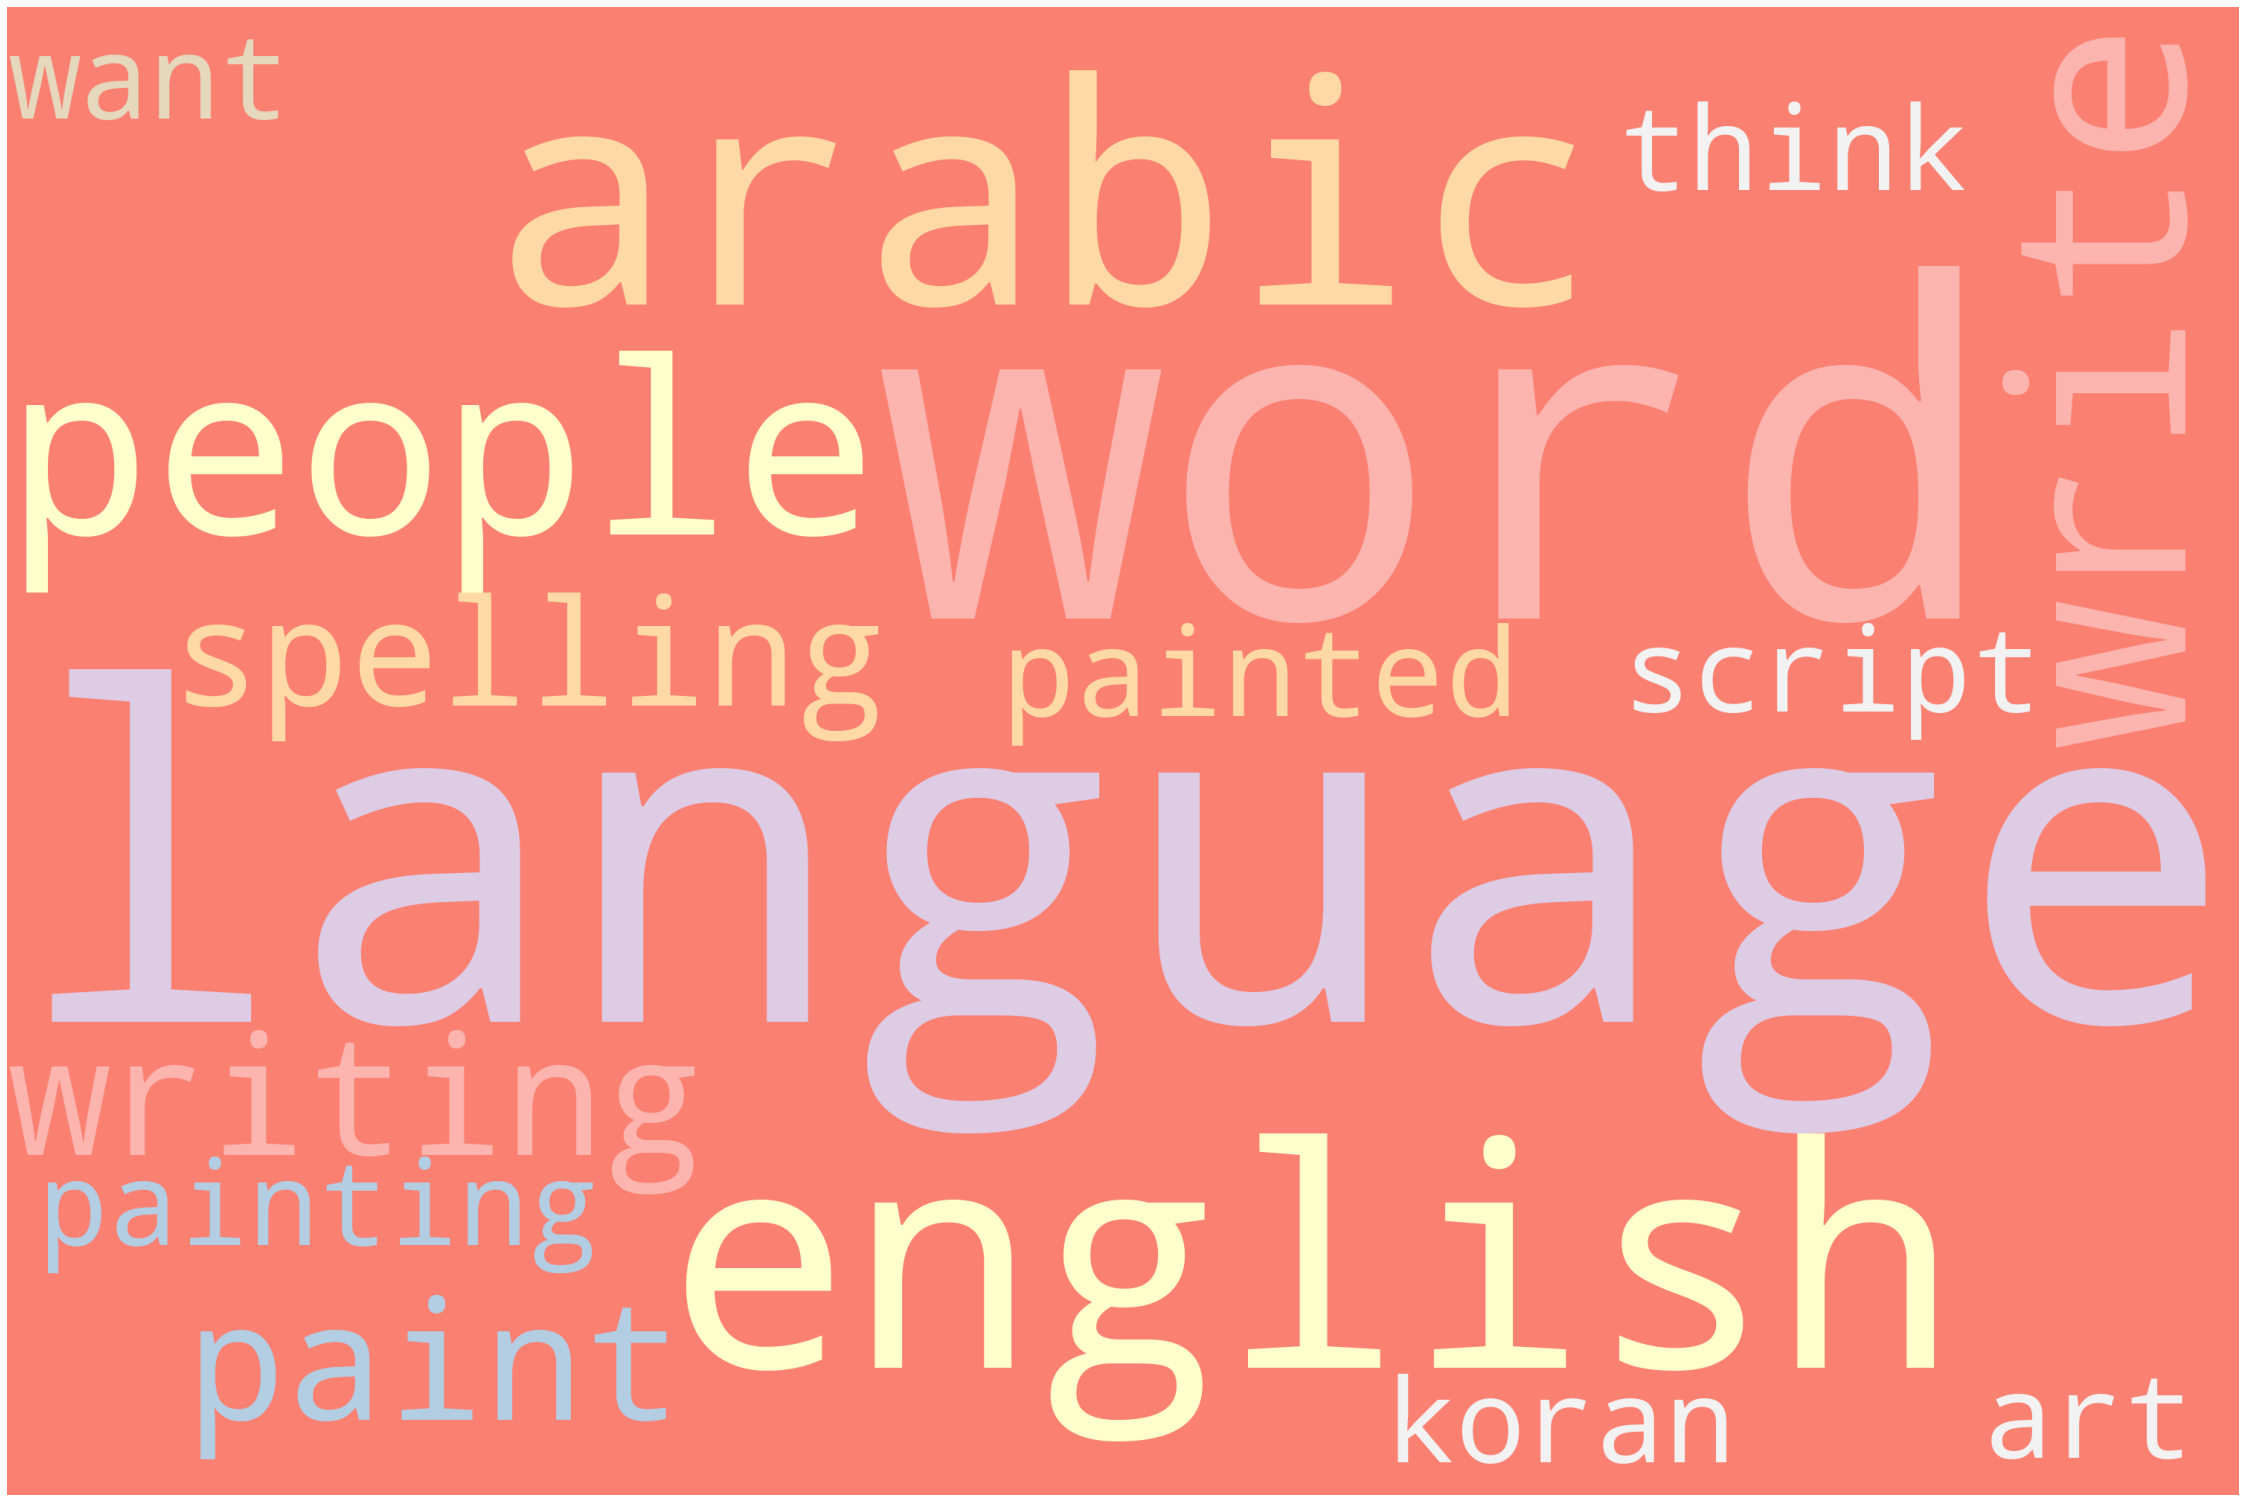

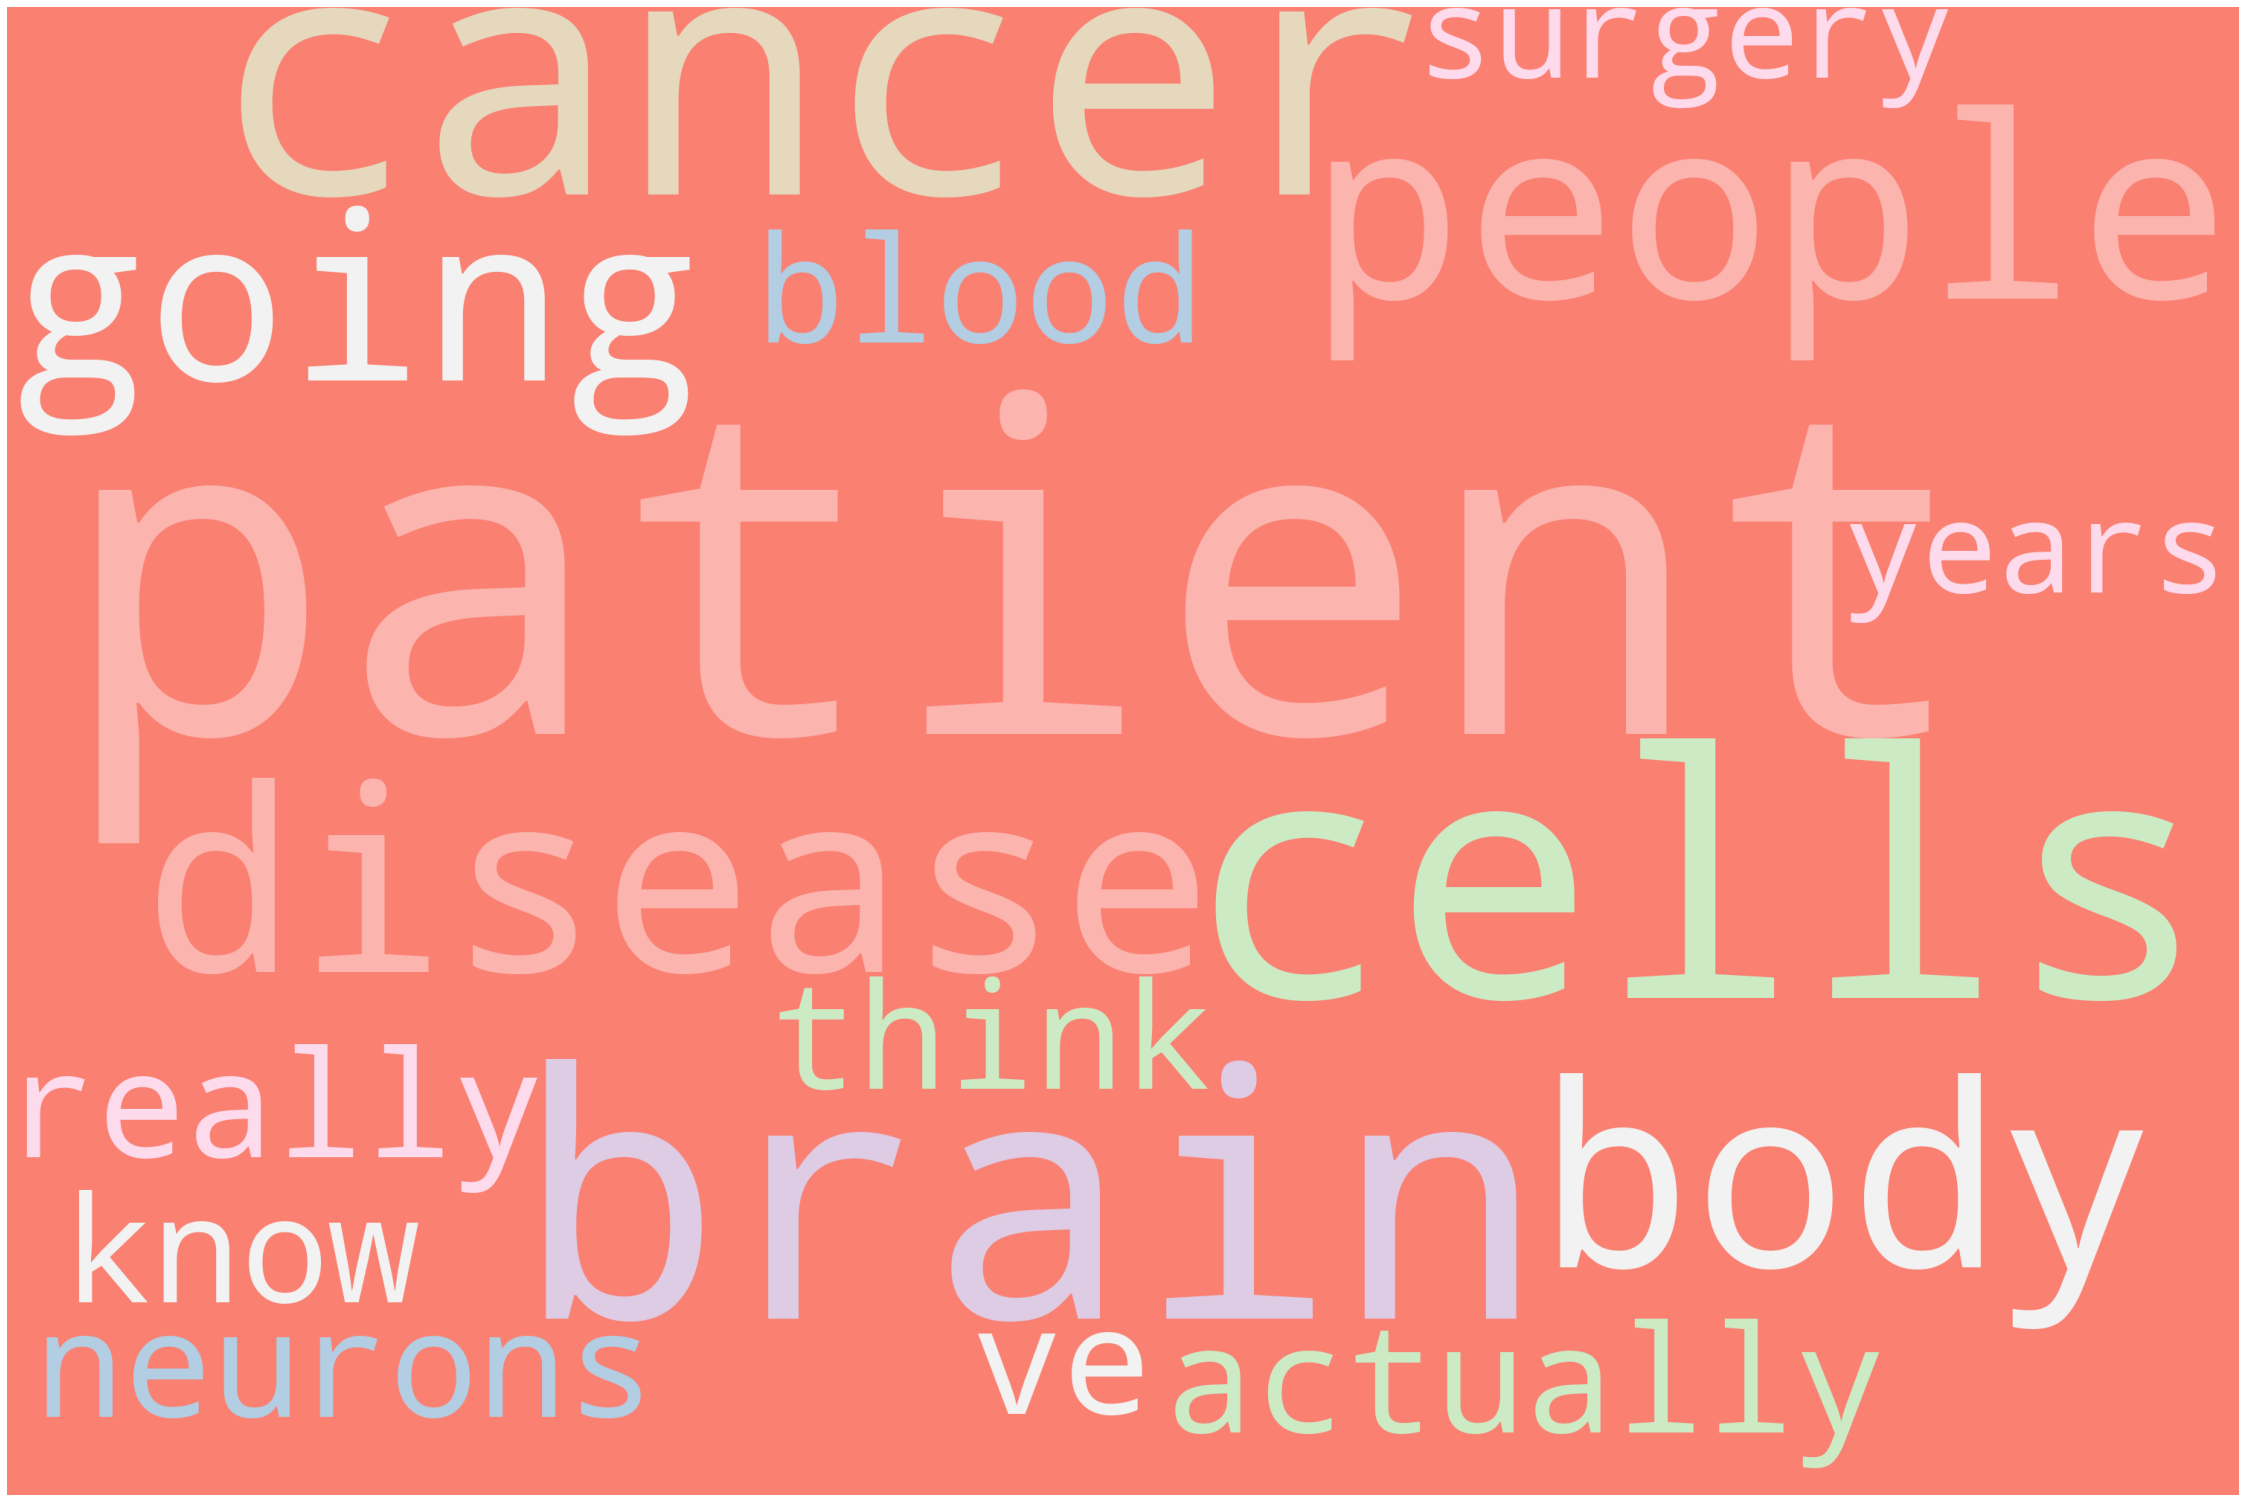

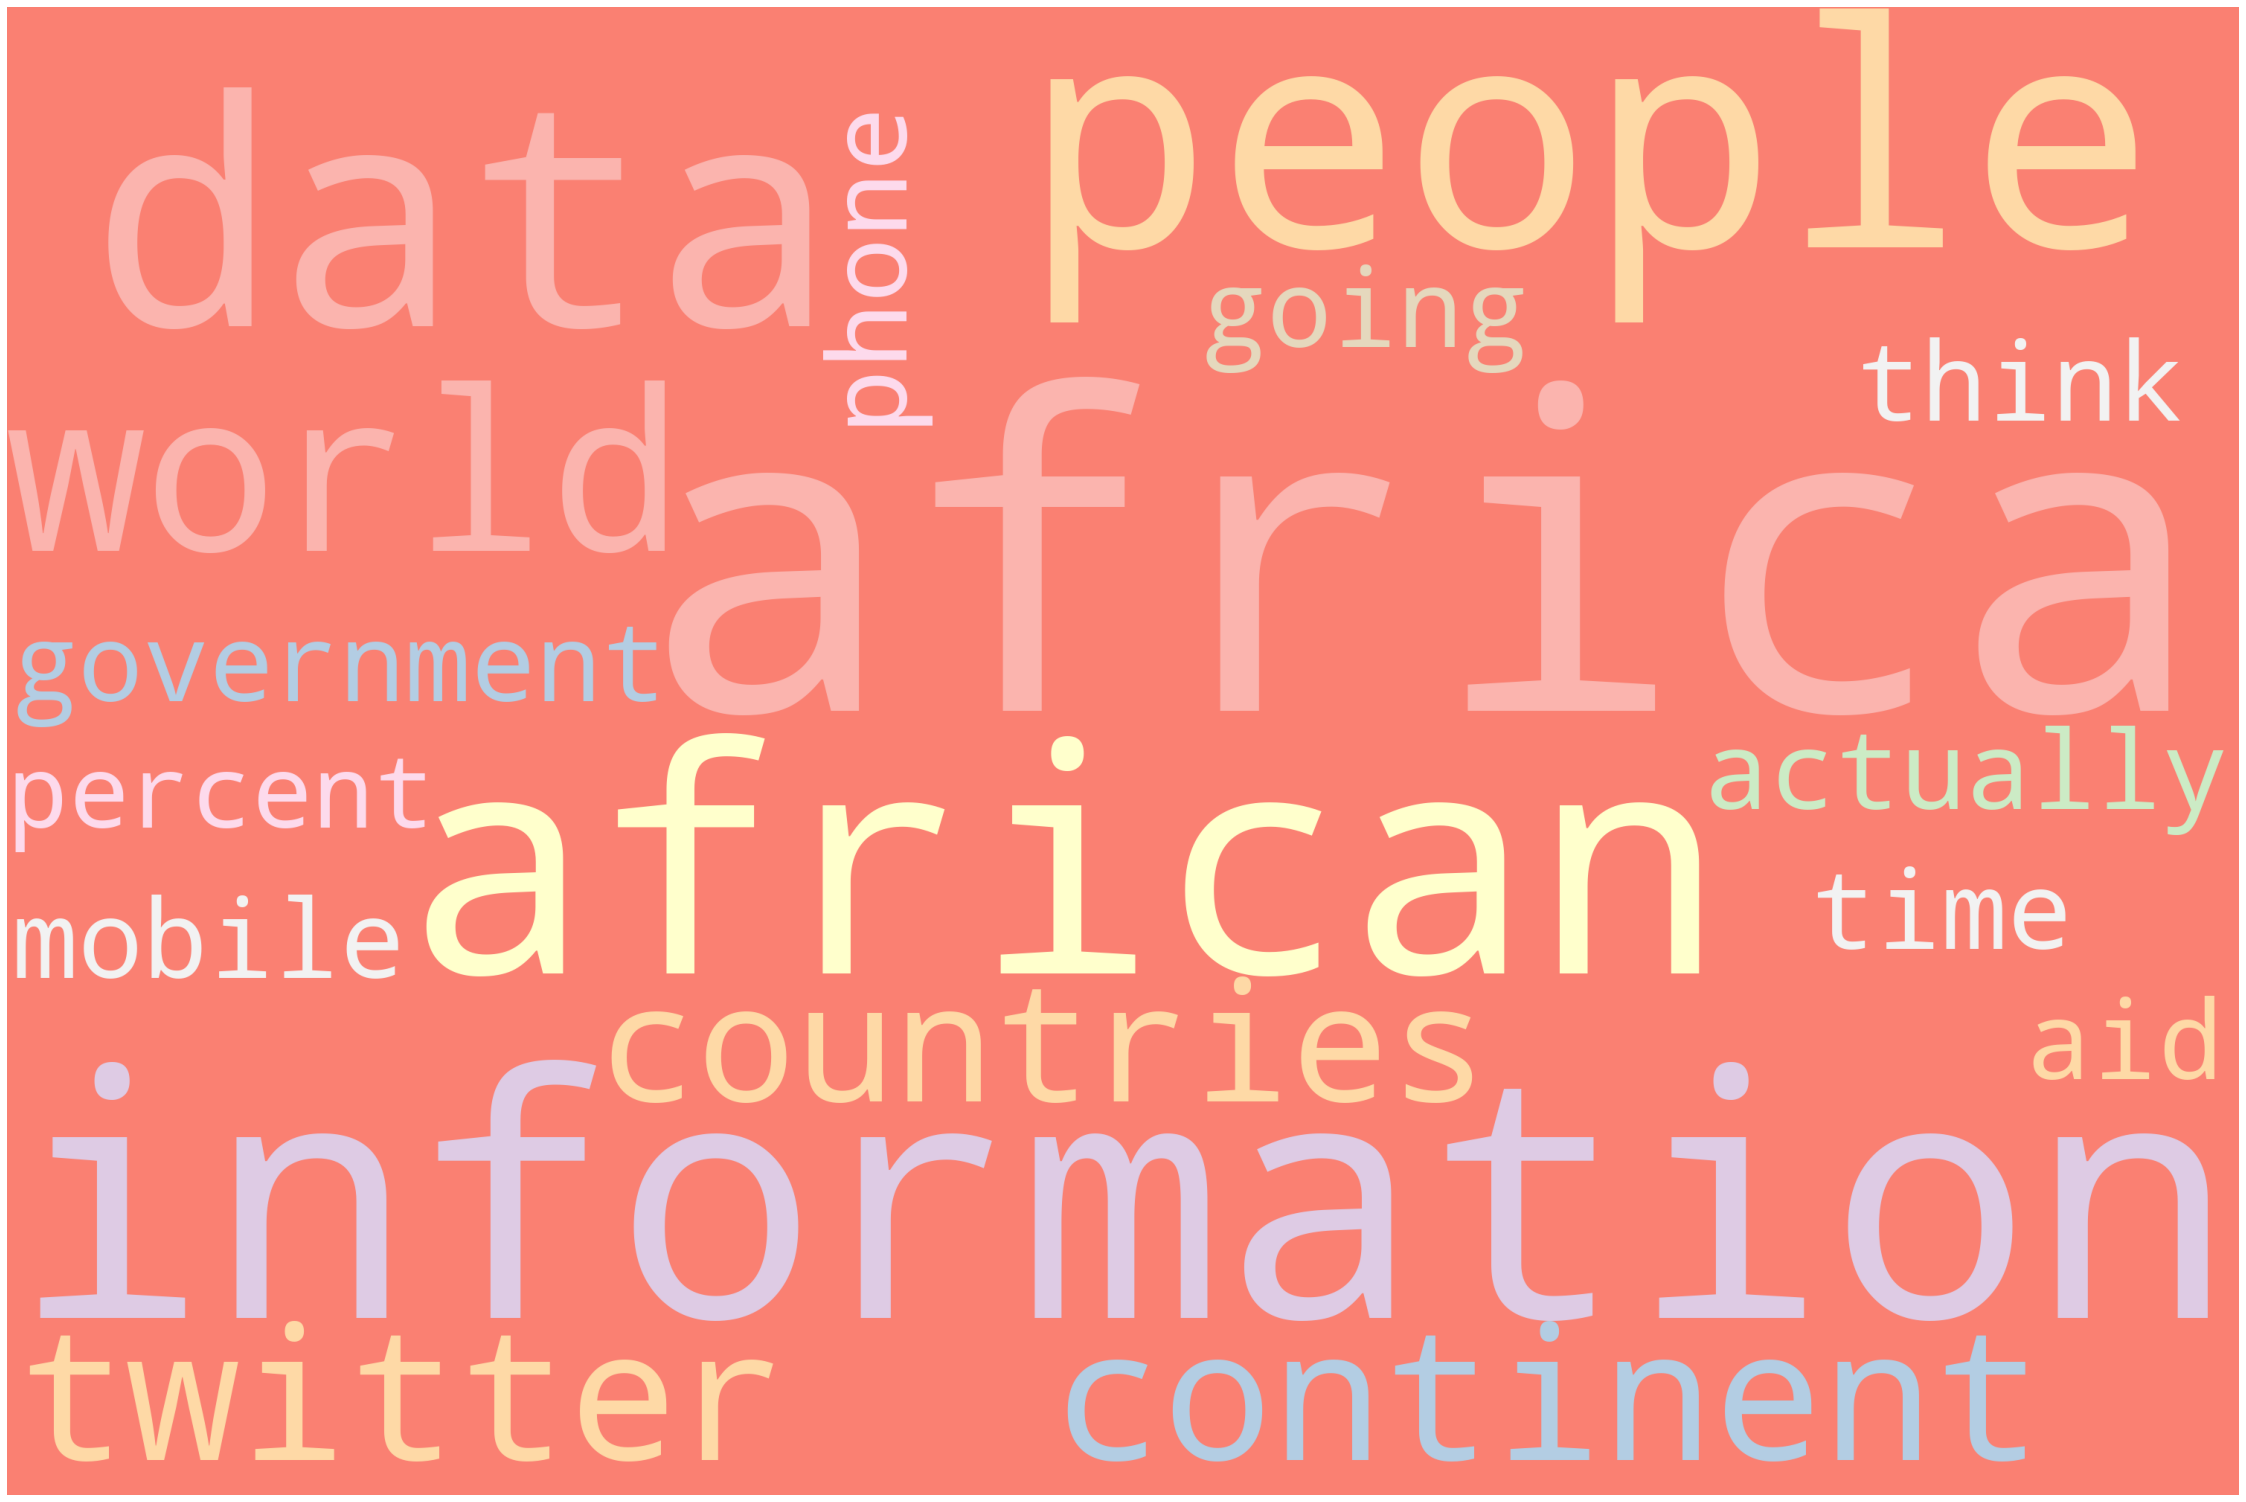

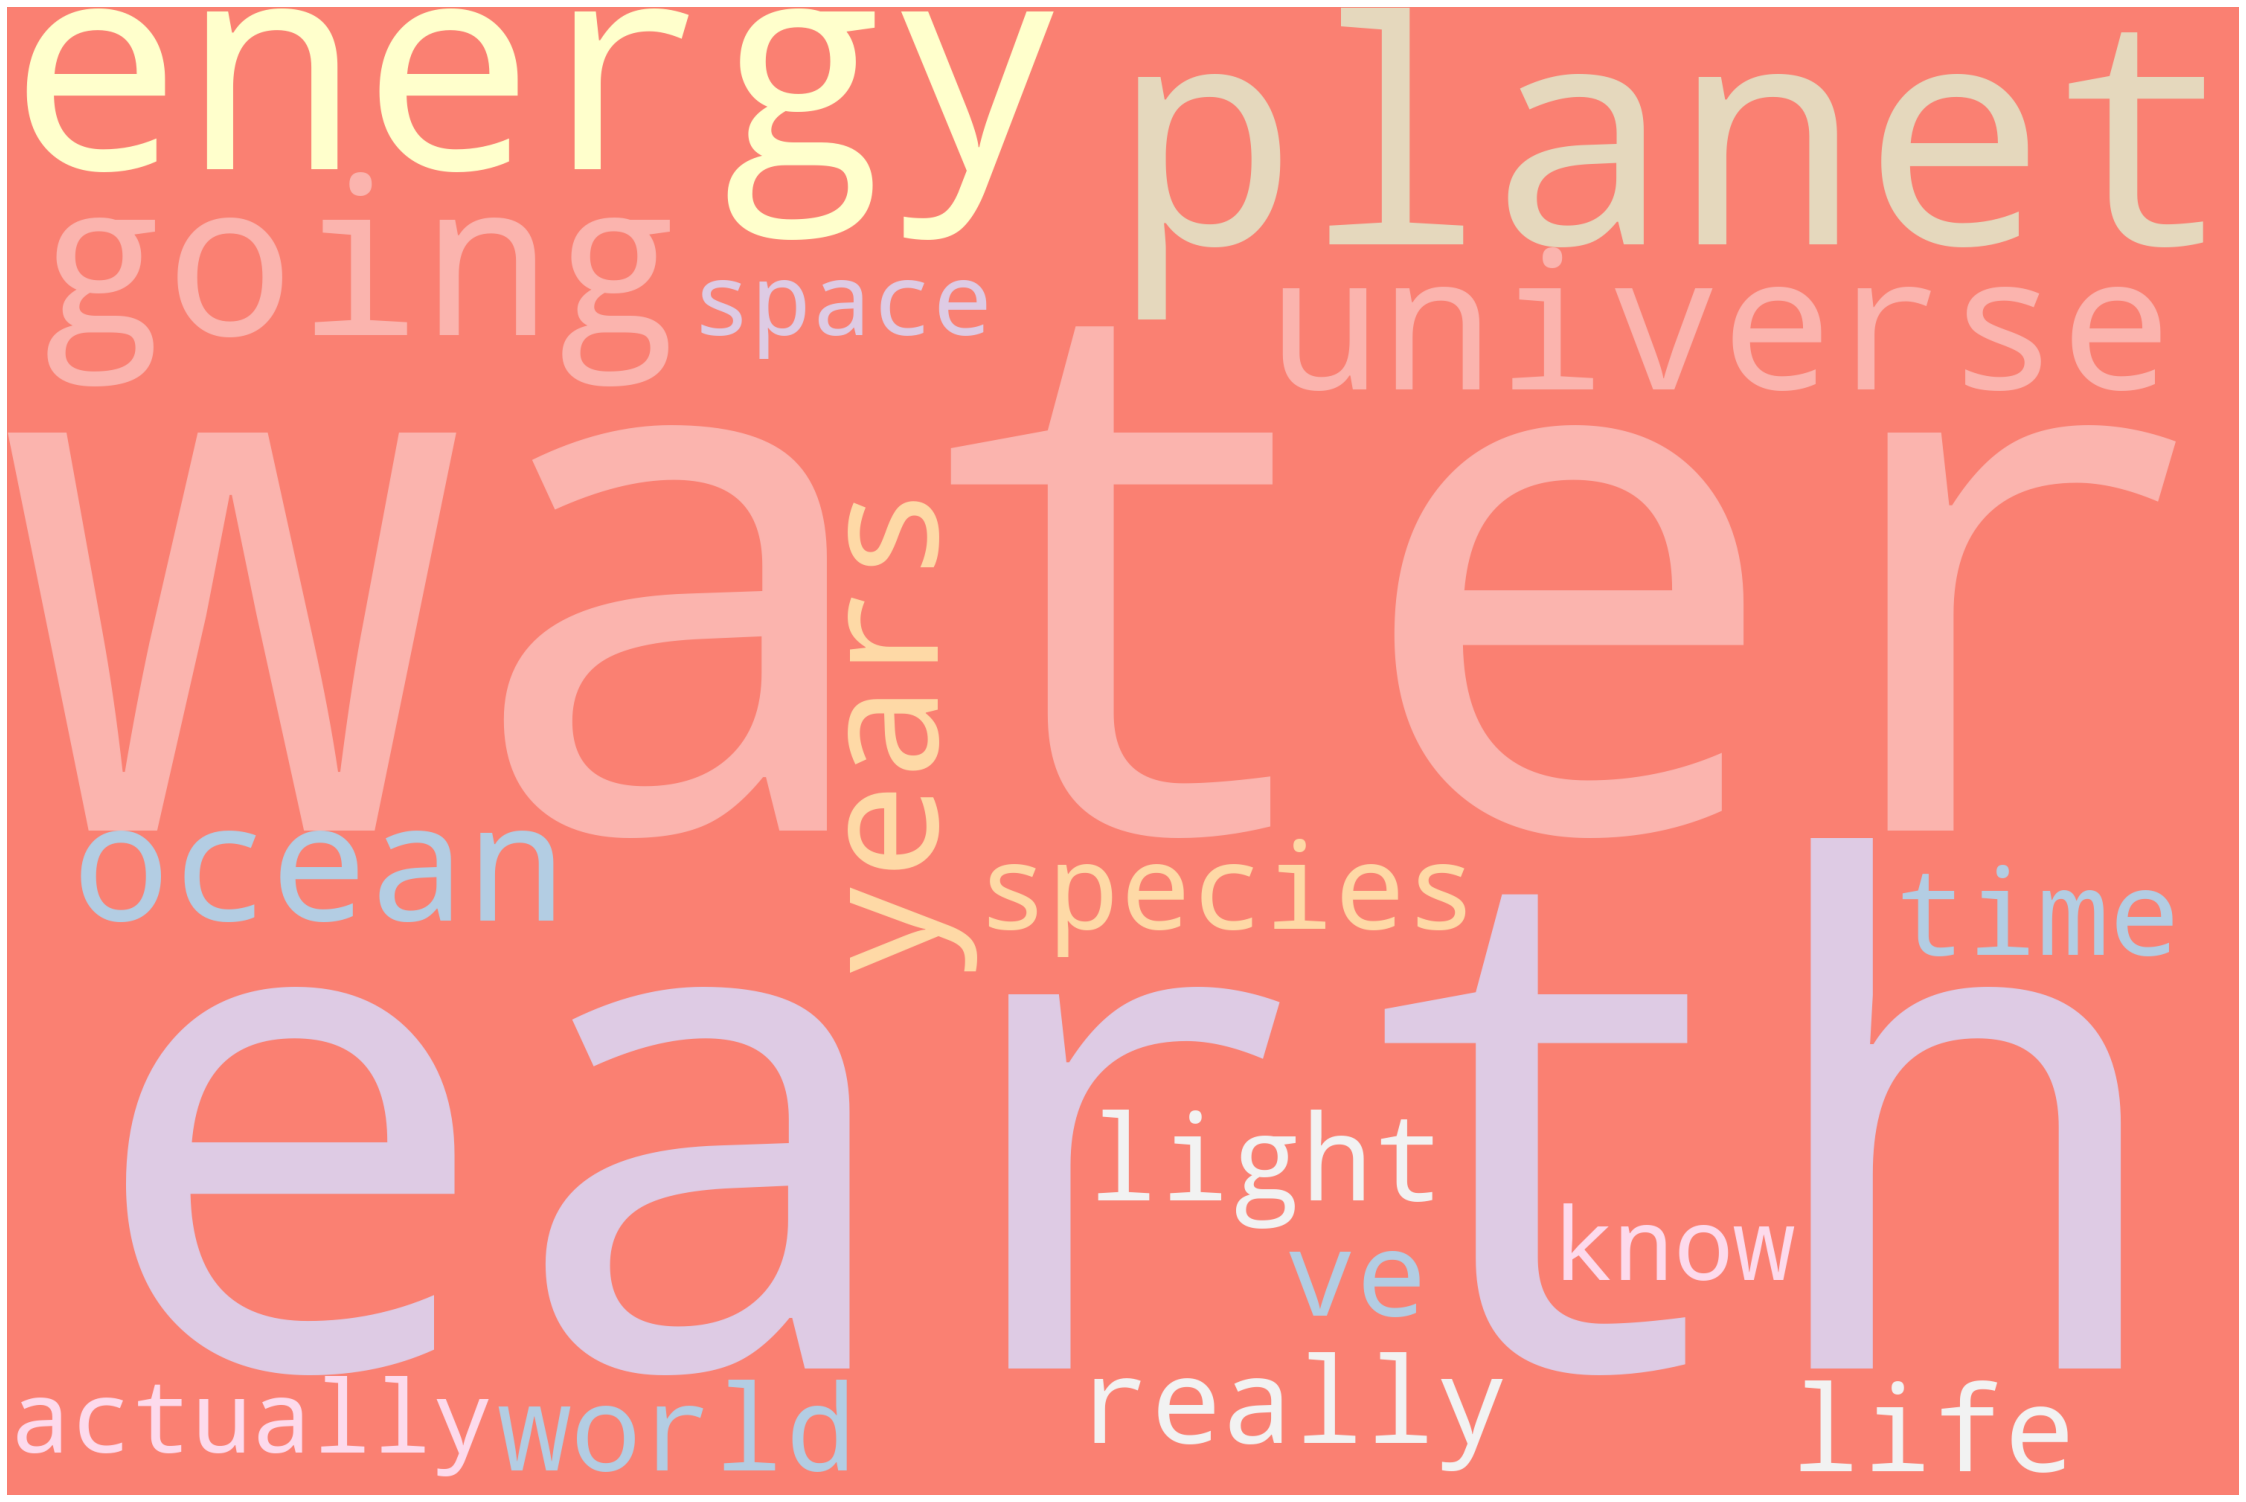

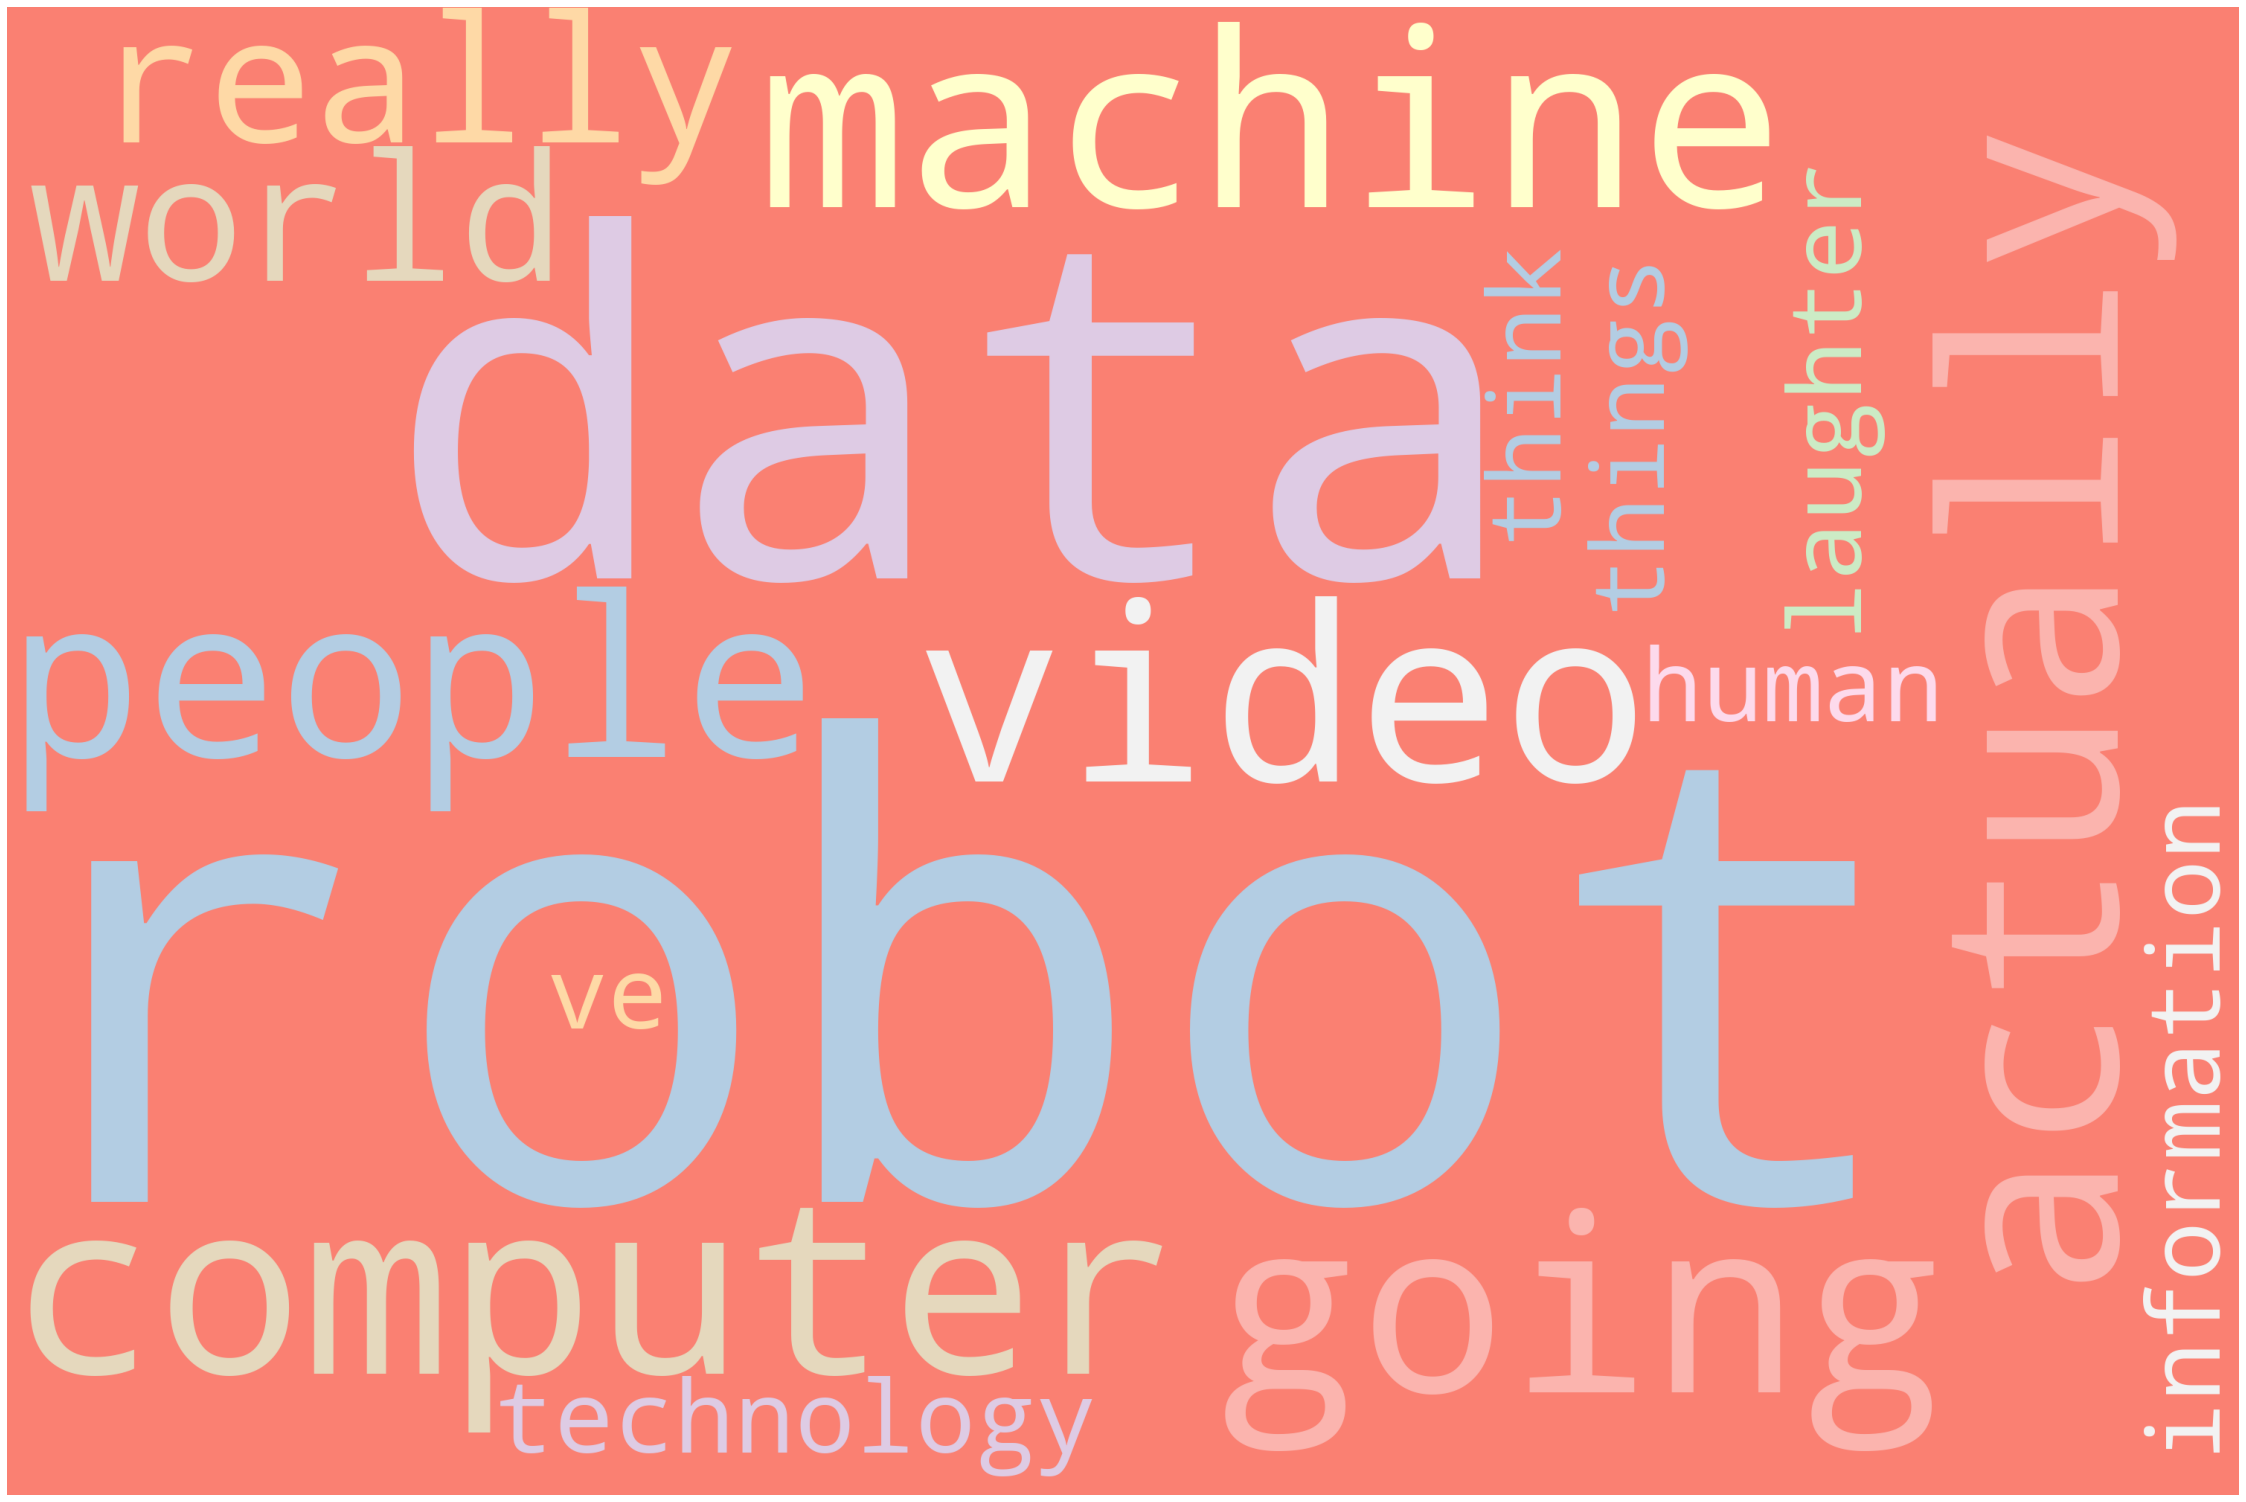

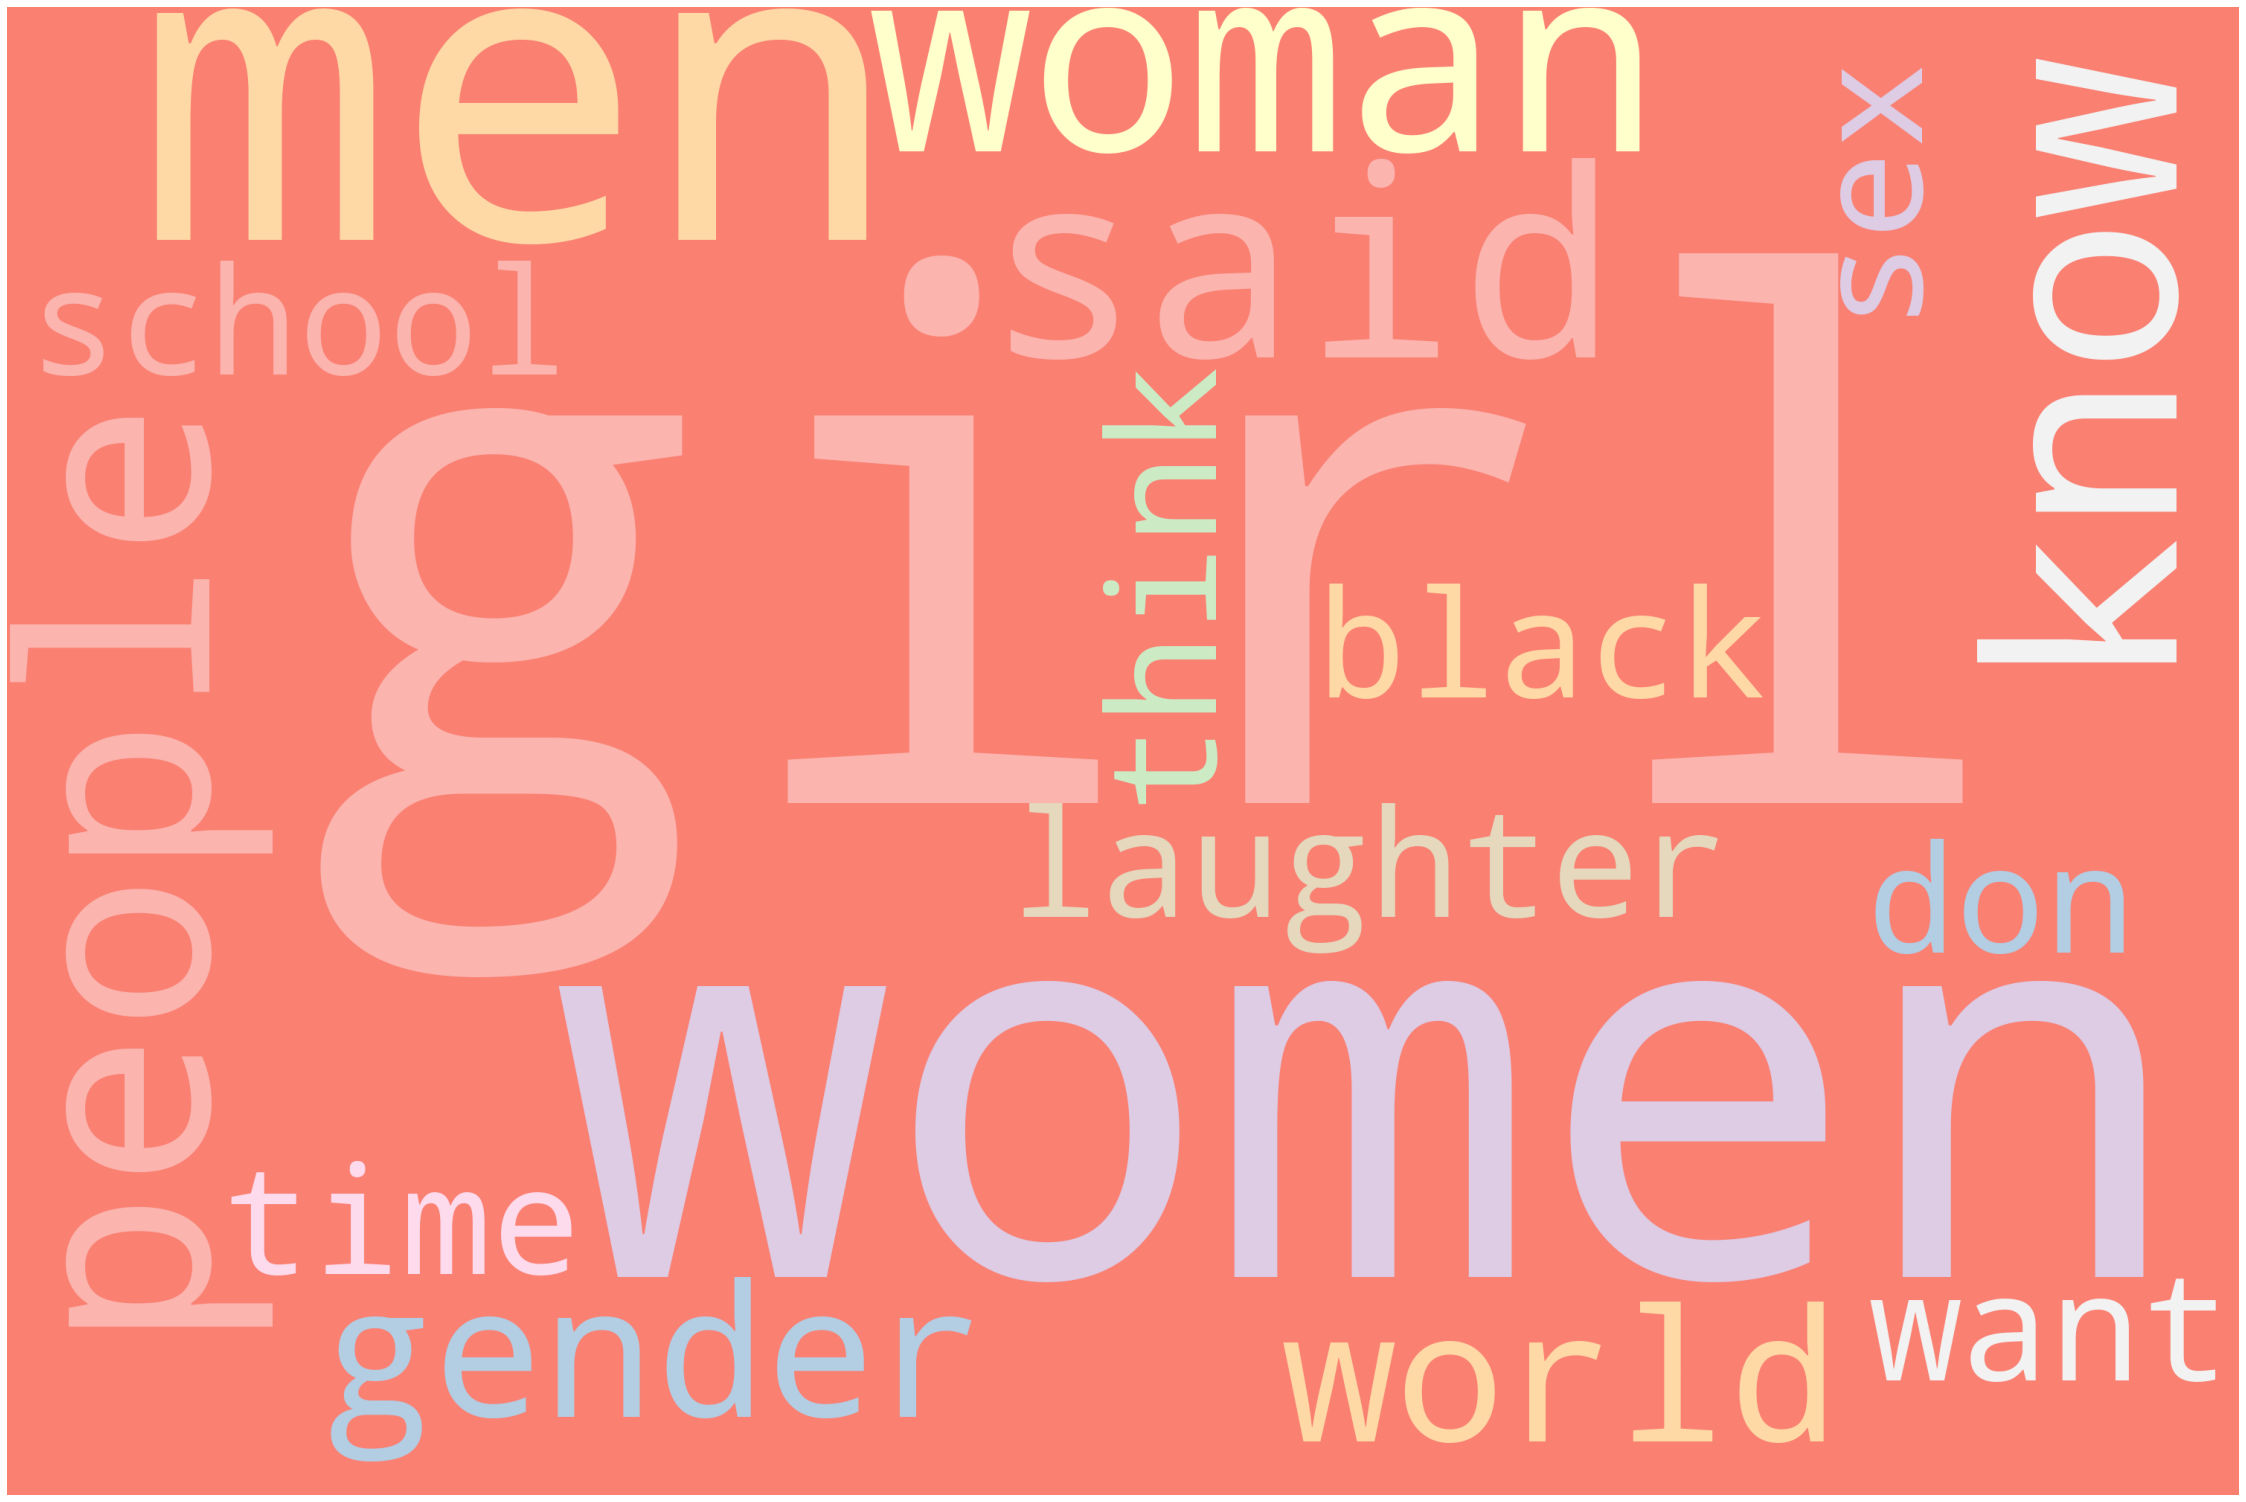

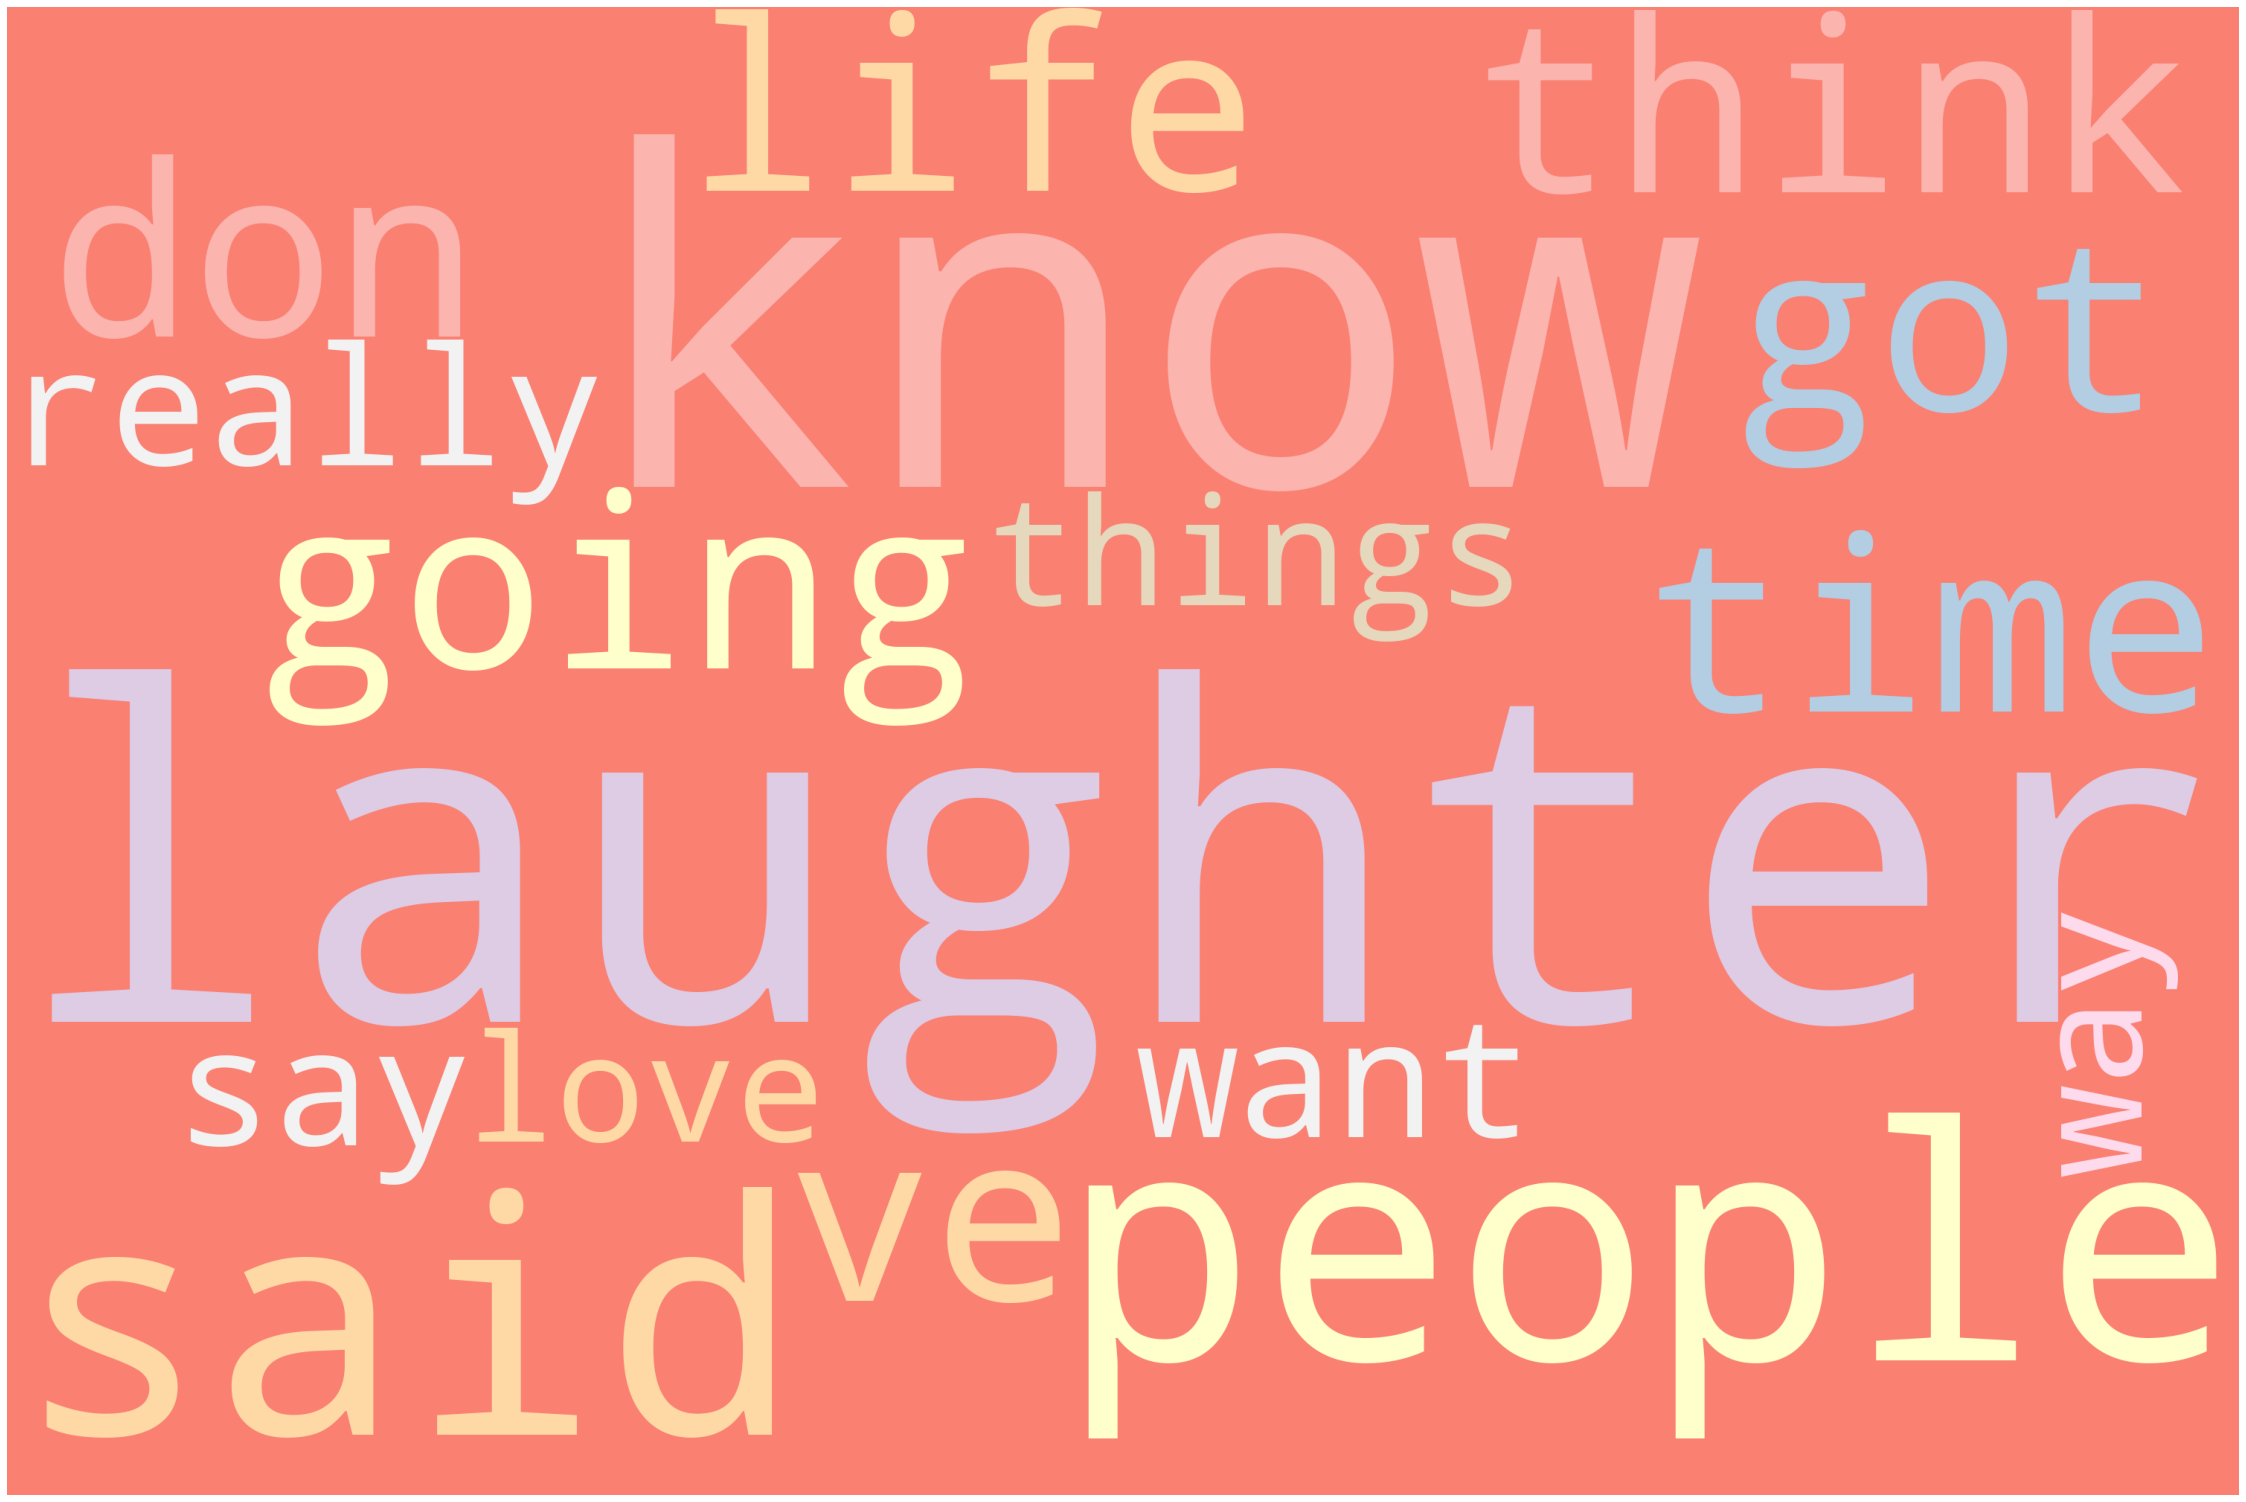

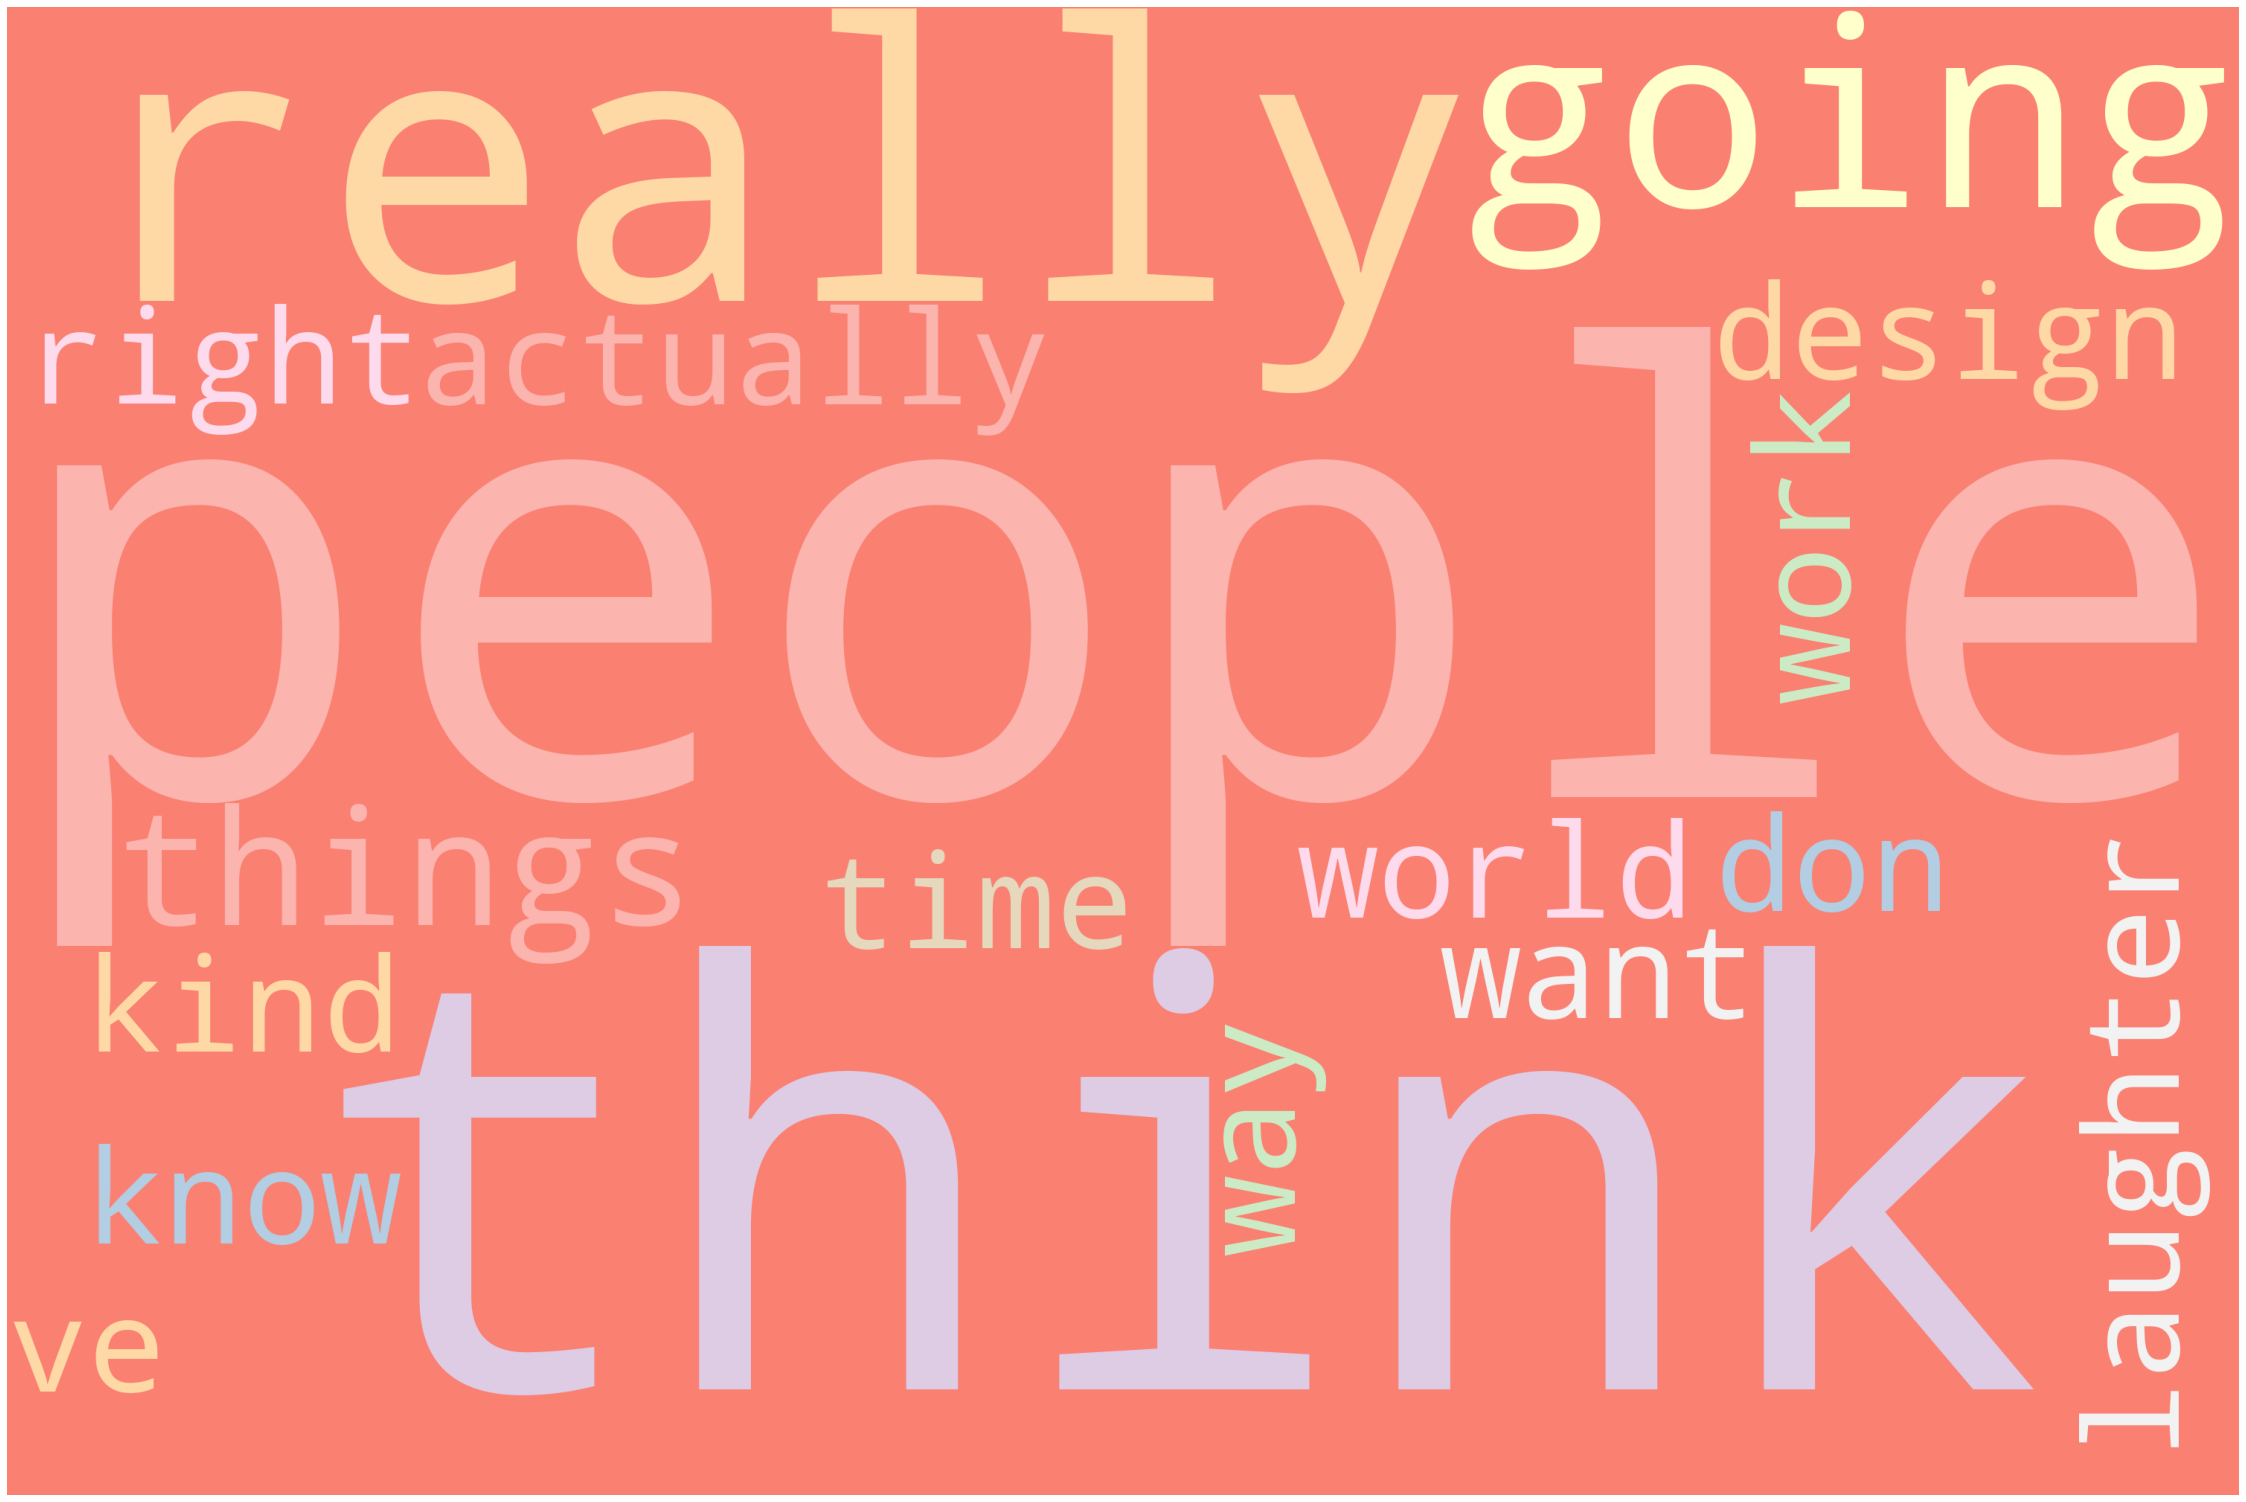

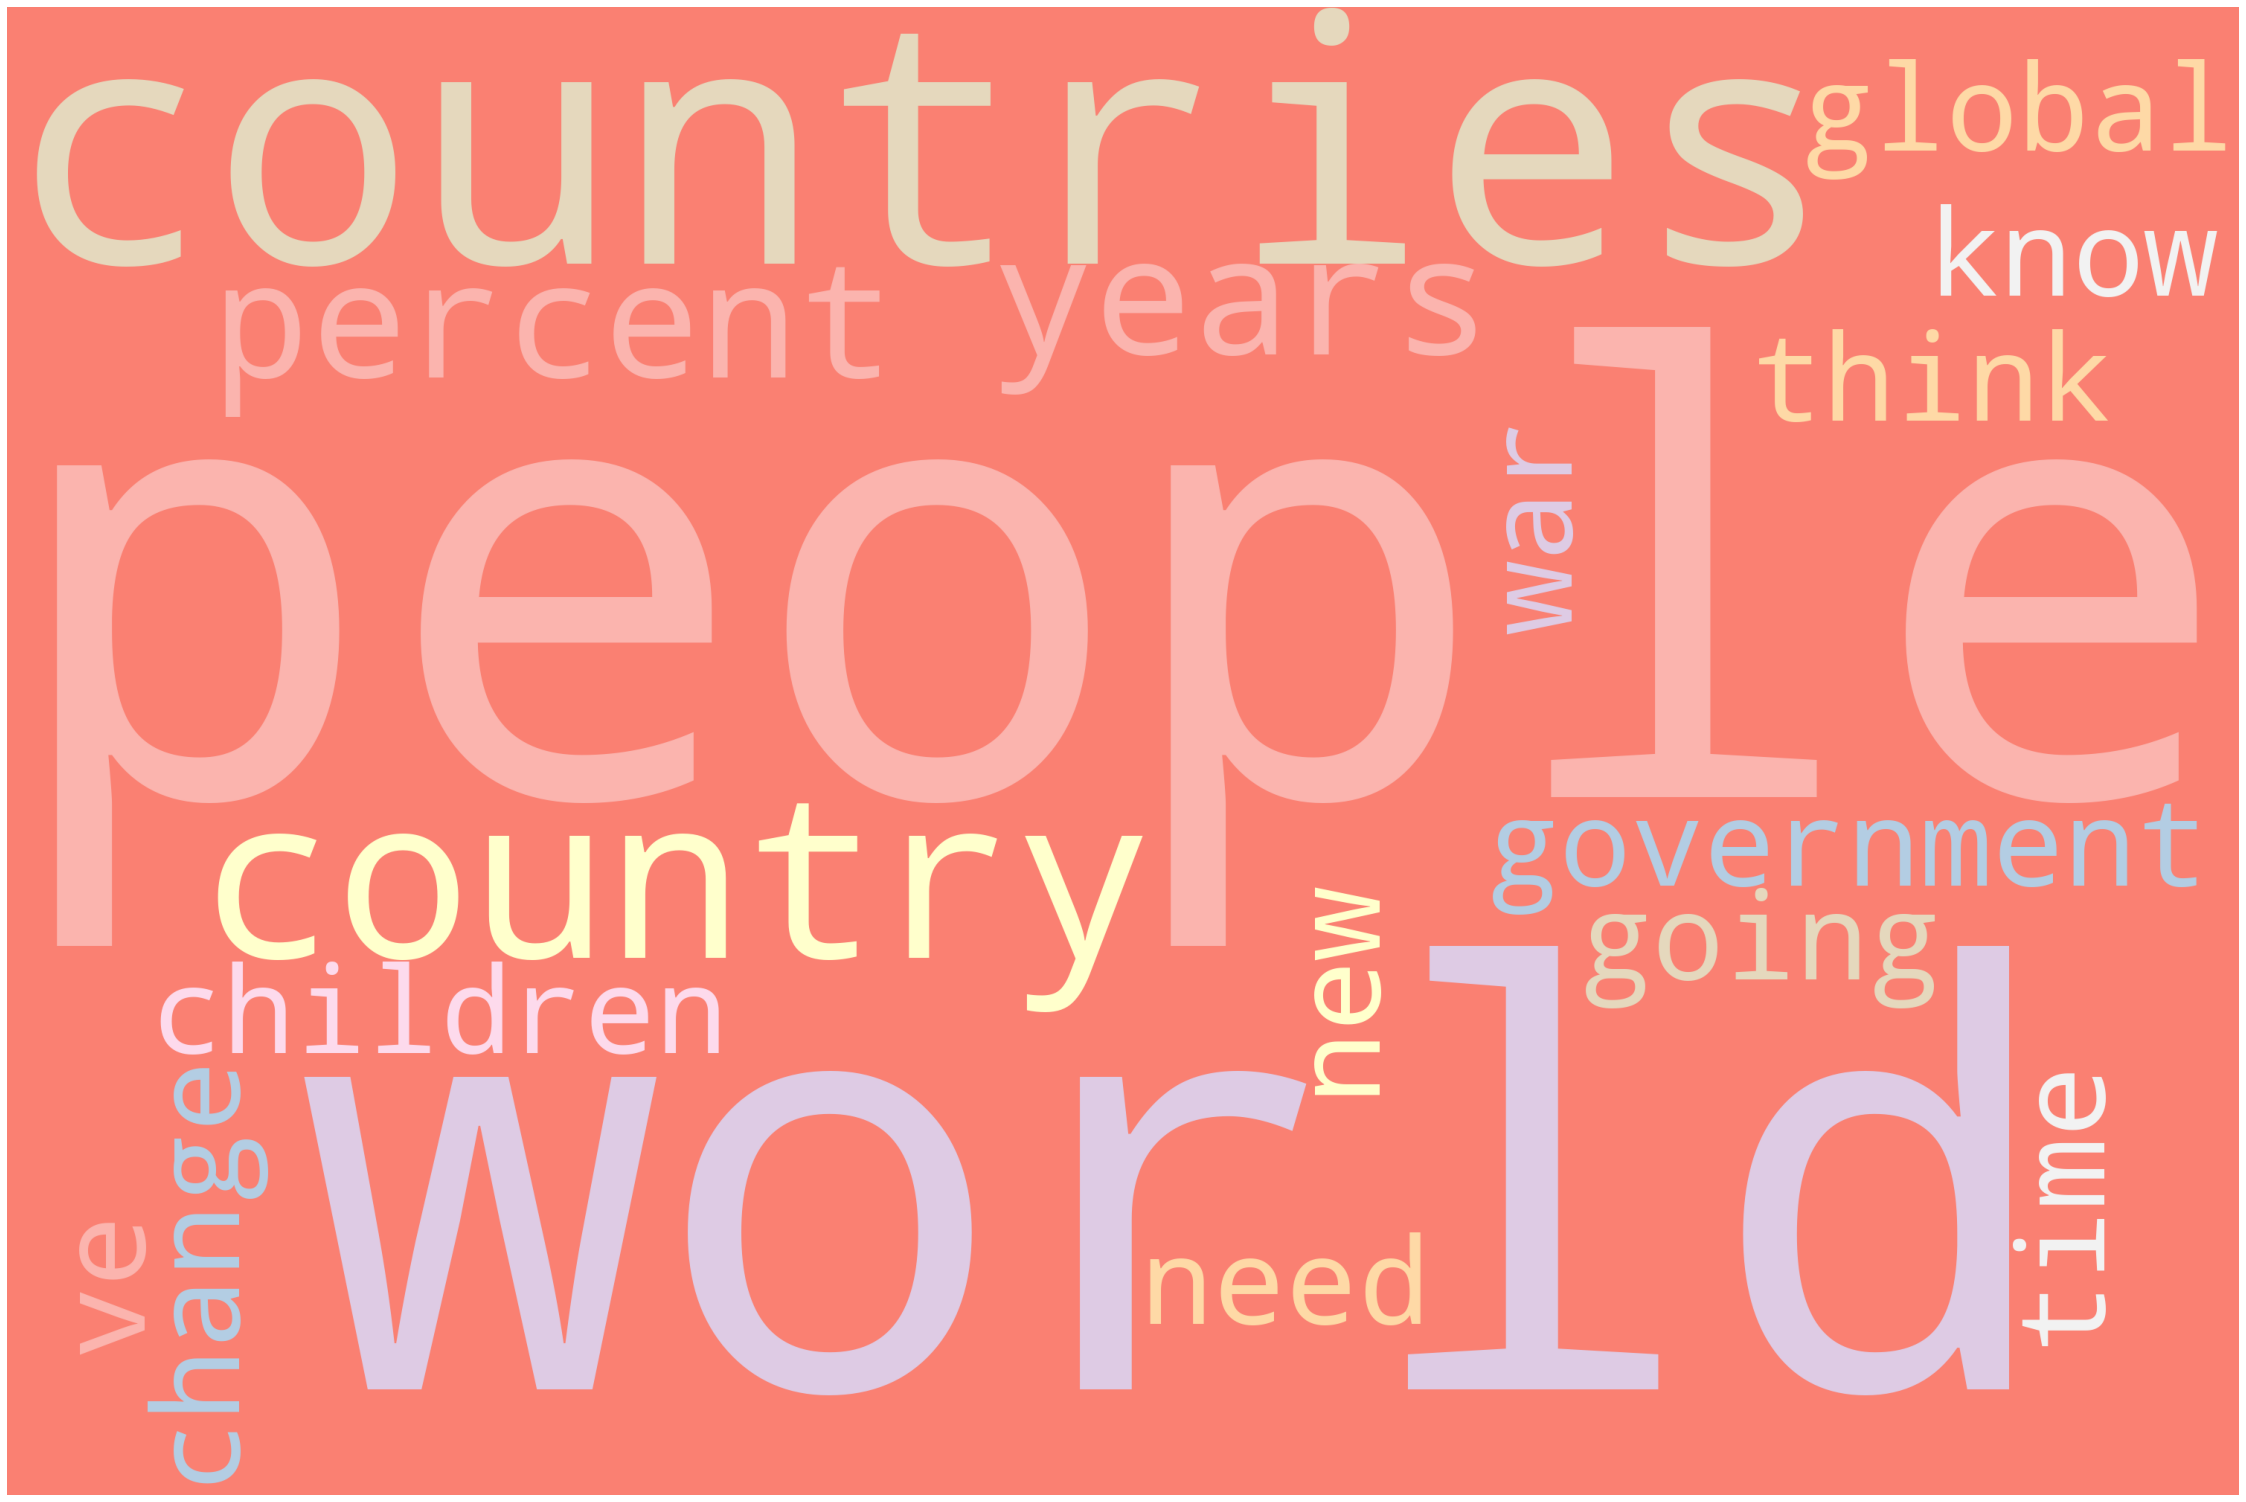

In [77]:
from sklearn import metrics
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# The mapping between feature (word)
# index and feature (word) can be obtained by
# the vectorizer's function get_feature_names()
centroids=np.array(clusterer.means())
sorted_centroids = centroids.argsort()[:, ::-1]
voc_lookup= tfidf_vect.get_feature_names()

#get words with top 20 tf-idf weight in the centroid
for i in range(num_clusters):

    top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
    print("Cluster %d:\n %s " % (i, ":".join(top_words)))
    Cluster = " ".join(top_words)

    # Generate and plot word cloud
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(Cluster)
    plot_cloud(wordcloud)



In [87]:
# Naming 10 clusters by the top20 words in each cluster.
Cluster_name = ['Music','Language', 'Health', 'Global','Environment', 'Technology issue', 'Gender and Ethical issues', 'Entertainment', 'Creativity','Change']

# Ten of the top 15 popular tags in EDA analysis by views (copied from mid-term)
The_top_15_popular_tags=['culture','health', 'design', 'global', 'technology','issues', 'animation', 'education', 'change','creativity']

Topic_clustering = pd.DataFrame()
Topic_clustering['Cluster'] = Cluster_name
Topic_clustering['Tag'] = The_top_15_popular_tags
print(Topic_clustering)



                     Cluster         Tag
0                      Music     culture
1                   Language      health
2                     Health      design
3                     Global      global
4                Environment  technology
5           Technology issue      issues
6  Gender and Ethical issues   animation
7              Entertainment   education
8                 Creativity      change
9                     Change  creativity
